# Keras MNIST Handwritten Digits

In [1]:
import struct
import array
import numpy as np
import matplotlib.pyplot as plt


def load_mnist(path_img, path_lbl):
    with open(path_lbl, 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        if magic != 2049:
            raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
        labels = array.array("B", file.read())

    with open(path_img, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        if magic != 2051:
            raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
        
        image_data = array.array("B", file.read())

    images = []
    for i in range(size):
        images.append([0] * rows * cols)

    for i in range(size):
        images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

    return images, labels, size, rows, cols

def display_mnist(images, labels, rows = 4, columns = 5):
    for i in range(rows * columns):
        # train[i][0] is i-th image data with size 28x28
        image = images[i,:,:, 0]  # not necessary to reshape if ndim is set to 2
        plt.subplot(rows, columns, i+1)          # subplot with size (width 3, height 5)
        plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
        # train[i][1] is i-th digit label
        plt.title('label = {}'.format(labels[i]))
        plt.axis('off')  # do not show axis value
    plt.tight_layout()   # automatic padding between subplots
    plt.show()

In [2]:
images, labels, size, rows, cols = load_mnist('mnist/train-images.idx3-ubyte','mnist/train-labels.idx1-ubyte')
images_train = np.array(images)
images_train = np.reshape(images_train, (size, rows, cols, 1));
labels_train = np.array(labels)
images_train.shape

(60000, 28, 28, 1)

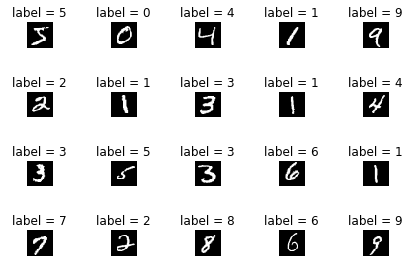

In [3]:
display_mnist(images_train, labels_train)

In [4]:
images, labels, size, rows, cols = load_mnist('mnist/t10k-images.idx3-ubyte','mnist/t10k-labels.idx1-ubyte')
images_test = np.array(images)
images_test = np.reshape(images_test, (size, rows, cols, 1));
labels_test = np.array(labels)
images_test.shape

(10000, 28, 28, 1)

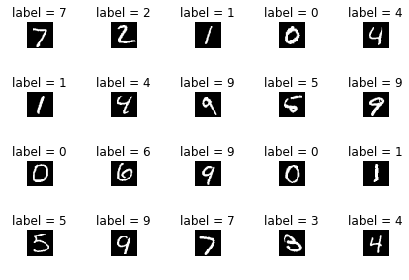

In [5]:
display_mnist(images_test, labels_test)

In [6]:
images_test = images_test / 255;
images_train = images_train / 255;

from keras.utils import np_utils
labels_test = np_utils.to_categorical(labels_test, num_classes=10)
labels_train = np_utils.to_categorical(labels_train, num_classes=10)

Using TensorFlow backend.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [8]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

In [9]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

In [10]:
classifier = Sequential()
classifier.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax',input_shape=(64,)))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                692288    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 693,578
Trainable params: 693,578
Non-trainable params: 0
_________________________________________________________________


In [12]:
classifier.fit(images_train, labels_train, batch_size=128, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 6s - loss: 0.2163 - acc: 0.9380     
Epoch 2/10
60000/60000 [==============================] - 4s - loss: 0.0674 - acc: 0.9799     
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.0465 - acc: 0.9857     
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.0353 - acc: 0.9890     
Epoch 5/10
60000/60000 [==============================] - 4s - loss: 0.0256 - acc: 0.9921     
Epoch 6/10
60000/60000 [==============================] - 4s - loss: 0.0202 - acc: 0.9940     
Epoch 7/10
60000/60000 [==============================] - 4s - loss: 0.0159 - acc: 0.9953     
Epoch 8/10
60000/60000 [==============================] - 4s - loss: 0.0112 - acc: 0.9970     
Epoch 9/10
60000/60000 [==============================] - 4s - loss: 0.0098 - acc: 0.9973     
Epoch 10/10
60000/60000 [==============================] - 4s - loss: 0.0080 - acc: 0.9977     


In [18]:
labels_pred = classifier.predict(images_test)

In [47]:
pred = [np.argmax(labels_pred[v,:]) for v in range(labels_pred.shape[0])]
test = [np.argmax(labels_test[v,:]) for v in range(labels_test.shape[0])]

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test, pred)

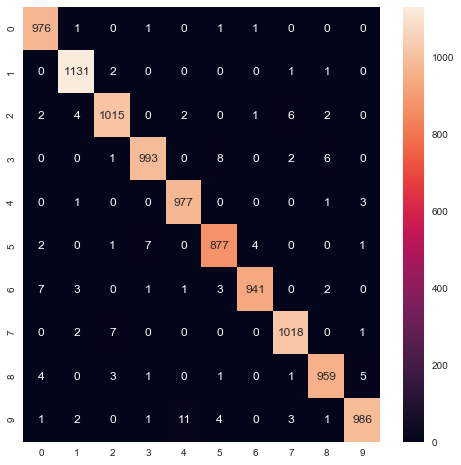

In [52]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
plt.figure(figsize = (8,8))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,fmt='0')
plt.show()

In [53]:
score = classifier.evaluate(images_test, labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0429489606379
Test accuracy: 0.9873


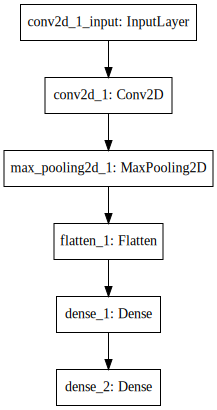

In [55]:
import pydot
# from keras.utils import plot_model
# plot_model(classifier, to_file='model.png')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(classifier).create(prog='dot', format='svg'))

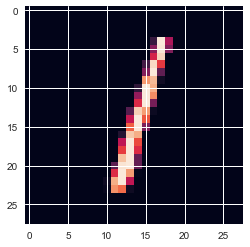

In [60]:
plt.imshow(images_test[2,:,:].reshape(28, 28))
plt.show()

In [61]:
# Check which items we got right / wrong
correct_indices = np.nonzero(pred == test)[0]

In [62]:
correct_indices

array([], dtype=int64)

In [108]:
correct = [pred[v]==test[v] for v in range(10000)]
correct = np.nonzero(correct)
correct = correct[0]
len(correct)

9873

In [109]:
incorrect = [pred[v]!=test[v] for v in range(10000)]
incorrect = np.nonzero(incorrect)
incorrect = incorrect[0]
len(incorrect)

127

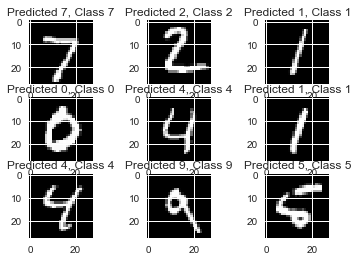

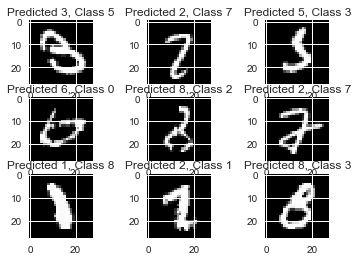

In [115]:
plt.figure()
for i, idx in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(images_test[idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(test[idx], pred[idx]))
plt.show()    
plt.figure()
for i, idx in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(images_test[idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(test[idx], pred[idx]))
plt.show()